# 1. Introduction
In this capstone project, I aim to provide insights that support stakeholders in making data-driven decisions to improve employee retention and satisfaction by fostering a healthier and more supportive work environment. Stakeholders have requested assistance in answering the key question: *What factors are likely to make an employee leave the company?*

The project focuses on developing a machine learning model to predict whether or not an employee will leave the company, enabling stakeholders to proactively address potential issues and enhance the accuracy of their decision-making. By identifying the key factors influencing employee attrition, this project offers actionable insights for both current and future workforce planning. 

# 2. PACE Stages
The analysis follows the PACE framework, systematically applying each stage to ensure a thorough and effective approach.

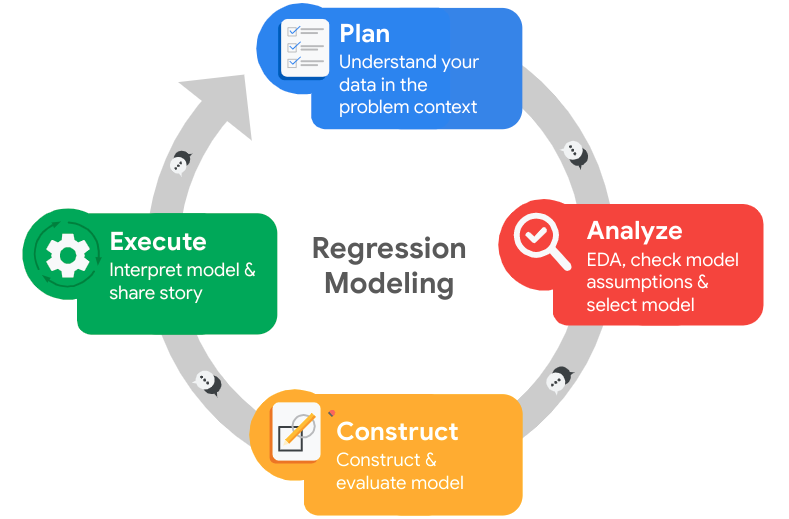

## 2.1 Planning Stage

**Background of the Problem:** The HR department aims to improve employee satisfaction to ensure retention and reduce turnover by identifying the key factors that contribute to employees leaving. This allows for more accurate decision-making to address the issue effectively and avoid the costs and time associated with hiring new employees.

To ensure the goals of this project align with stakeholders' expectations and interests, it is important to establish key questions and assumptions that directly impact the core of the problem. These questions will guide the analysis, while the assumptions will be tested or justified throughout the project.

**Key Questions:** The key question driving this project is: *“What factors are likely to make an employee leave the company?”* While this question is essential, it is quite broad. To make the analysis more focused and manageable, we can break it down into smaller, more specific sub-questions:
* Who are the employees most likely to leave?
* Why do employees leave?
* When are employees most likely to leave?
  
This approach not only simplifies the problem but also helps structure the analysis and leads to a more comprehensive answer to the core question.
  
**Potential Stakeholders:**
* The company's data team
* Cross-functional team members
* HR department

### Import Data and Libraries

In [1]:
# Import Packages
# For data manipulation
import numpy as np
import pandas as pd
import warnings
import math

warnings.filterwarnings("ignore", category=FutureWarning)

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(["#0173B2", "#DE8F05"])

# For data modeling
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report


In [2]:
# Load Data
df = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Exploration (Initial EDA and data cleaning)

* Understand your variables
* Clean your dataset (missing data, redundant data, outliers)

#### Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB



#### Descriptive statistics Information

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



Colums name need to fix speling errors and standerizing as some featurs start with capital and some with small. 

In [5]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('[^a-z0-9_]', '', regex=True)  # Remove other special characters
)

# Fix spelling Errors
df.rename(columns={
    'average_montly_hours':'average_monthly_hours',
    'time_spend_company': 'tenure'
}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Check Missing data
The dataset does not contain any missing values.

In [7]:
df.replace('', np.nan, inplace=True)  # Convert empty strings to NaN
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### Check duplicates

In [8]:
df.duplicated().sum()

3008

The dataset contains **3,008** duplicated records, representing approximately **20%** of the total dataset. This is a significant portion, and dropping these rows without further investigation could potentially introduce bias or lead to inaccurate conclusions. Therefore, it's important to conduct a deeper investigation to understand the nature of these duplicates before deciding how to handle them.

In [9]:
df[df.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
df[
    (df['last_evaluation'] == 0.57) &
    (df['satisfaction_level'] == 0.46) &
    (df['left'] == 1) &
    (df['average_monthly_hours'] == 139)
].sort_values(by='last_evaluation')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
23,0.46,0.57,2,139,3,0,1,0,sales,low
396,0.46,0.57,2,139,3,0,1,0,sales,low
12023,0.46,0.57,2,139,3,0,1,0,sales,low
12396,0.46,0.57,2,139,3,0,1,0,sales,low
14234,0.46,0.57,2,139,3,0,1,0,sales,low
14607,0.46,0.57,2,139,3,0,1,0,sales,low


After further investigation, one of the duplicated records appears seven times, with all **10 columns containing identical values**. Since each row represents a unique employee, it's highly unlikely—even implausible—that seven different employees would have exactly the same values across all fields. This strongly suggests that these duplicates are not legitimate. Therefore, the best approach is to **exclude them from the analysis** to prevent them from biasing the results or influencing the accuracy of insights drawn from the data.

In [11]:
df = df.drop_duplicates().reset_index(drop=True)
print("Remaining duplicates:", df.duplicated().sum())

Remaining duplicates: 0


#### Check Outliers

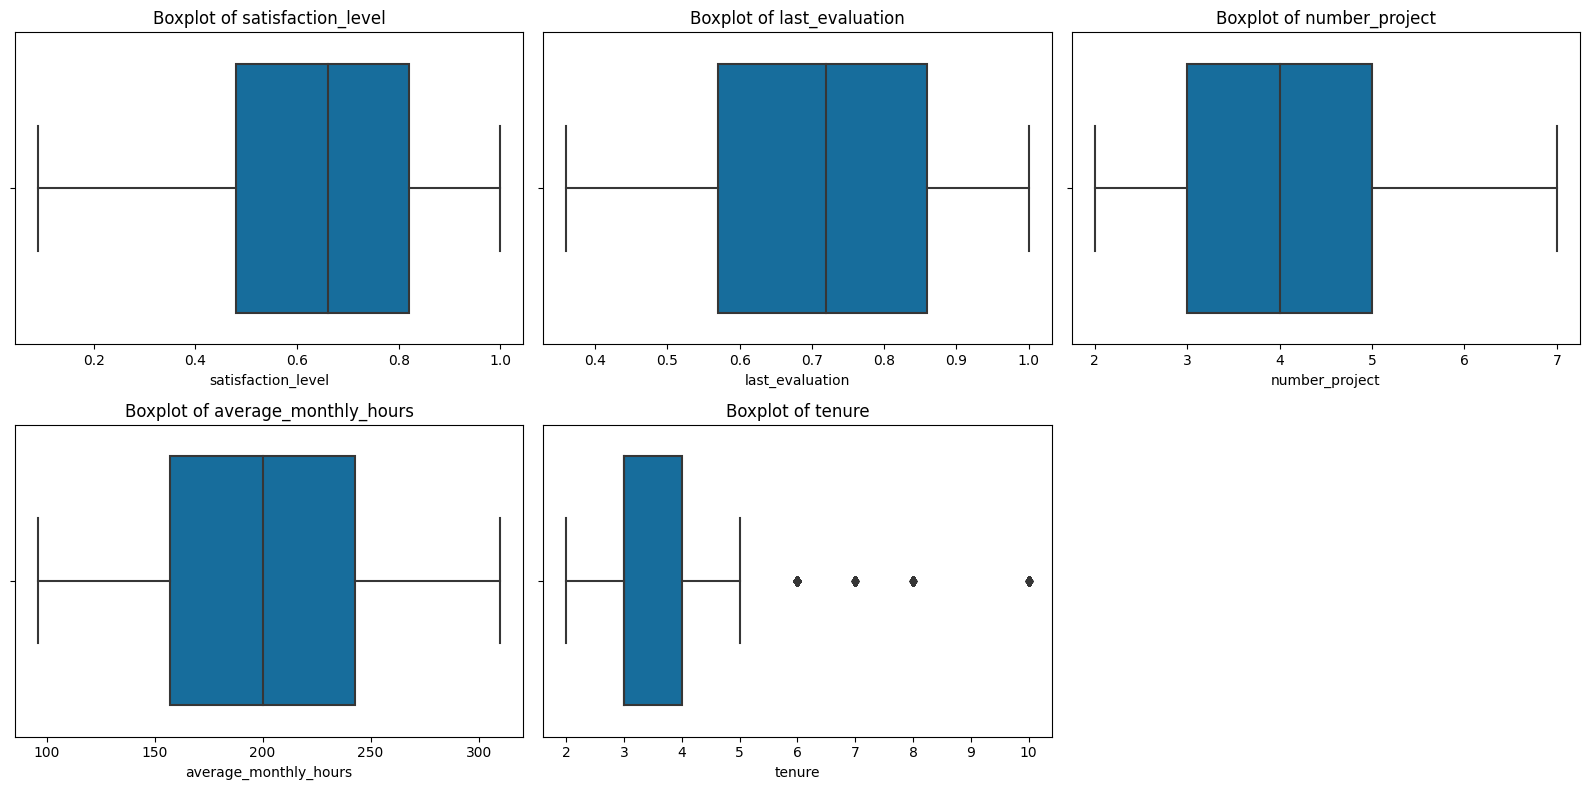

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                if df[col].nunique() > 2]

# Set up the plot
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [13]:
# Determine the number of rows containing outliers

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Loop through numeric columns and count outliers
for col in numeric_cols:
    outlier_count = count_outliers(df[col])
    print(f"{col}: {outlier_count} outliers")

satisfaction_level: 0 outliers
last_evaluation: 0 outliers
number_project: 0 outliers
average_monthly_hours: 0 outliers
tenure: 824 outliers


The column **tenure** is the only feature that contains outliers, with **824** records identified as such. This represents approximately **7%** of the dataset. 
Some models are sensitive to outliers, while others are more robust. Since we have not yet decided which model to use, we will postpone the decision to exclude outliers until after model selection.

## 2.2 Analyze Stage
 * Perform EDA (analyze relationships between variables)

### Feature Engineer

Convert the Salary column into number (1: Low,2: Med and 3: High)

In [14]:
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary_cls'] = df['salary'].map(salary_mapping)

### Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
left_count = (df['left'].value_counts())
left_count.index = ['Stayed (0)', 'Left (1)']

left_percent = (df['left'].value_counts(normalize=True) * 100).round(2)
left_percent.index = ['Stayed (0)', 'Left (1)']

print(left_count)
print(left_percent)

Stayed (0)    10000
Left (1)       1991
Name: count, dtype: int64
Stayed (0)    83.4
Left (1)      16.6
Name: proportion, dtype: float64


Out of **11,991** records, **1,991** employees (approximately **17%**) left the company, while the remaining **83%** stayed. This indicates that the dataset is **imbalanced**, with a higher proportion of retained employees compared to those who left.

#### Data Visualisation

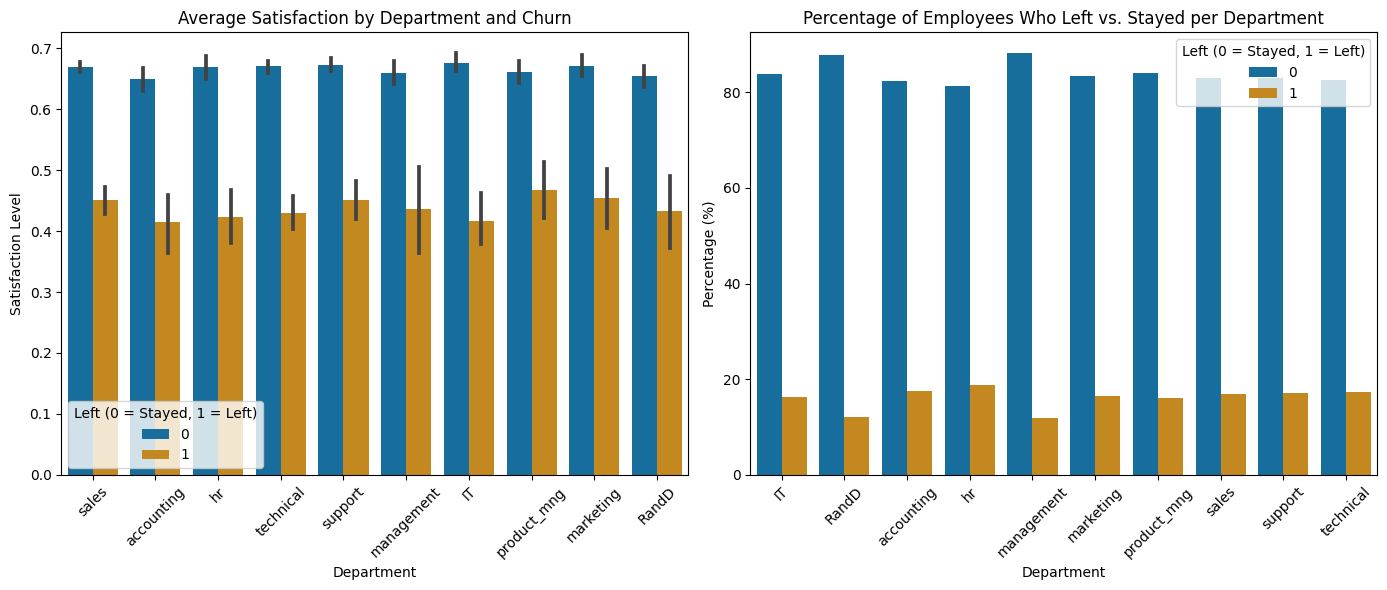

In [16]:
# Prepare churn percentage data per department
dept_churn = (
    df.groupby('department')['left']
    .value_counts(normalize=True)
    .rename('percent')
    .reset_index()
)
dept_churn['percent'] = (dept_churn['percent'] * 100).round(1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Subplot 1: Satisfaction level by department and churn status ---
sns.barplot(
    data=df,
    x='department',
    y='satisfaction_level',
    hue='left',
    estimator='mean',
    ax=axes[0]
)
axes[0].set_title('Average Satisfaction by Department and Churn')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Satisfaction Level')
axes[0].legend(title='Left (0 = Stayed, 1 = Left)')
axes[0].tick_params(axis='x', rotation=45)

# --- Subplot 2: Left vs. Stayed % per department ---
sns.barplot(
    data=dept_churn,
    x='department',
    y='percent',
    hue='left',
    ax=axes[1]
)
axes[1].set_title('Percentage of Employees Who Left vs. Stayed per Department')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title='Left (0 = Stayed, 1 = Left)')
axes[1].tick_params(axis='x', rotation=45)

# Final layout
plt.tight_layout()
plt.show()


As observed from the above plots comparing the proportion of employees who left versus stayed and their corresponding satisfaction levels, there is **no significant difference** across most departments. This suggests that the department feature may not have a strong influence.

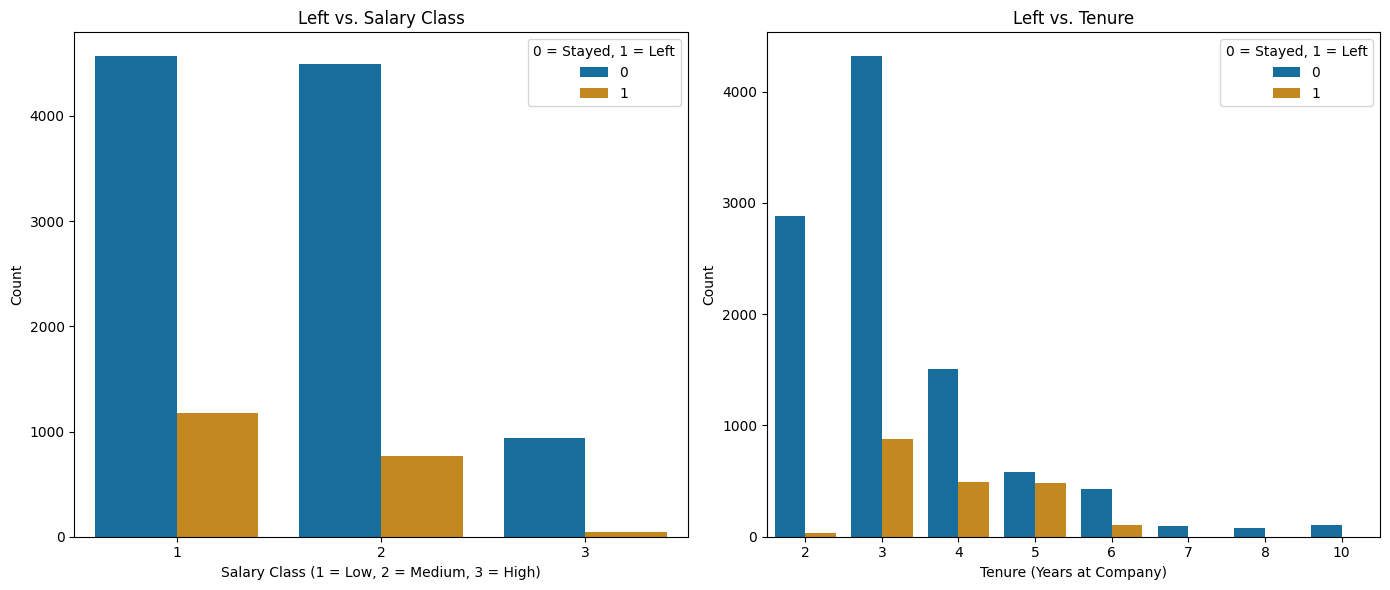

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Subplot 1: Countplot of Salary Class vs Left
sns.countplot(data=df, x='salary_cls', hue='left', ax=axes[0])
axes[0].set_title('Left vs. Salary Class')
axes[0].set_xlabel('Salary Class (1 = Low, 2 = Medium, 3 = High)')
axes[0].set_ylabel('Count')
axes[0].legend(title='0 = Stayed, 1 = Left')

#Subplot 2: Countplot of Tenure vs Left
sns.countplot(data=df, x='tenure', hue='left', ax=axes[1])
axes[1].set_title('Left vs. Tenure')
axes[1].set_xlabel('Tenure (Years at Company)')
axes[1].set_ylabel('Count')
axes[1].legend(title='0 = Stayed, 1 = Left')

plt.tight_layout()
plt.show()


In [18]:
total_counts = df.groupby('salary_cls').size()
left_counts = df[df['left'] == 1].groupby('salary_cls').size()

# Compute proportions (%)
proportion_left = (left_counts / total_counts * 100).round(1)
print(proportion_left)

salary_cls
1    20.5
2    14.6
3     4.8
dtype: float64


The left plot illustrates the relationship between salary class and the proportion of employees who left. As expected, 
* Employees with the lowest salary are more likely to leave **(21%)**
* Followed by those in the medium salary class **(15%)**
* Finally those with the highest salary **(5%)**. 

This trend suggests that higher pay may be associated with better retention.

In [19]:
# Group by tenure and count total employees
total_by_tenure = df.groupby('tenure').size()

# Group by tenure and count only those who left
left_by_tenure = df[df['left'] == 1].groupby('tenure').size()

# Calculate percentage of left
left_percentage = (left_by_tenure / total_by_tenure * 100).round(1).fillna(0)

print(left_percentage)

tenure
2      1.1
3     16.8
4     24.7
5     45.4
6     20.1
7      0.0
8      0.0
10     0.0
dtype: float64


The data shows that employee attrition is highest at year **5**, with **45.4%** leaving, indicating a potential tipping point related to burnout, unmet expectations, or lack of advancement. Attrition gradually increases from year **3 (16.8%) to year 4 (24.7%)**, suggesting growing disengagement over time. Interestingly, year **2** has the lowest attrition at **1.1%**, implying strong early retention. After year **6**, attrition drops significantly, reaching **0%** by years **7, 8, and 10**, indicating that employees who stay beyond six years are highly loyal or satisfied.

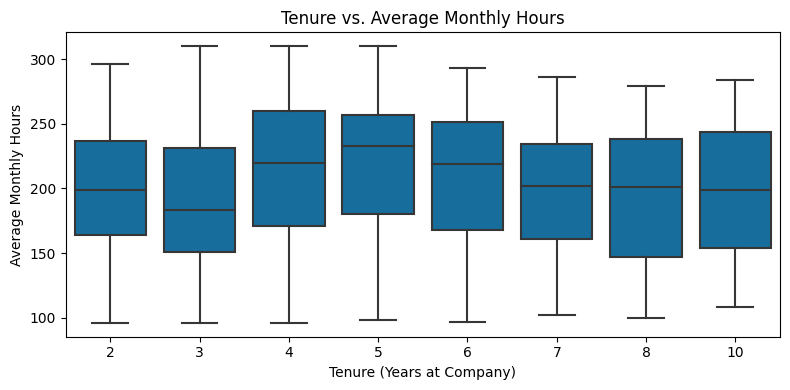

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot: Tenure vs. Average Monthly Hours using boxplot with one color
sns.boxplot(data=df, x='tenure', y='average_monthly_hours', color='#0173B2', ax=ax)  # Blue from colorblind palette

# Labels and title
ax.set_title('Tenure vs. Average Monthly Hours')
ax.set_xlabel('Tenure (Years at Company)')
ax.set_ylabel('Average Monthly Hours')

plt.tight_layout()
plt.show()


In [21]:
# Calculate median average_monthly_hours by tenure
median_hours = df.groupby('tenure')['average_monthly_hours'].median().round(1)
print(median_hours)

tenure
2     199.0
3     183.0
4     220.0
5     233.0
6     219.0
7     202.0
8     201.0
10    199.0
Name: average_monthly_hours, dtype: float64


* The median average monthly working hours peaked at **233** hours for **5-year** tenure.
* Followed closely by **220** and **219** hours for employees with **4** and **6** years, respectively.
* The lowest median was **183** hours for **3-year** tenure. Interestingly, despite working the least, **16%** of **3-year** employees still left, suggesting that factors beyond workload—such as lack of engagement or growth—may contribute to attrition.
*  In contrast, employees with moderate workloads **(199–202 hours)** in years **2, 7, 8 and 10** showed more stability, indicating that this workload range may be a sweet spot for employee retention.

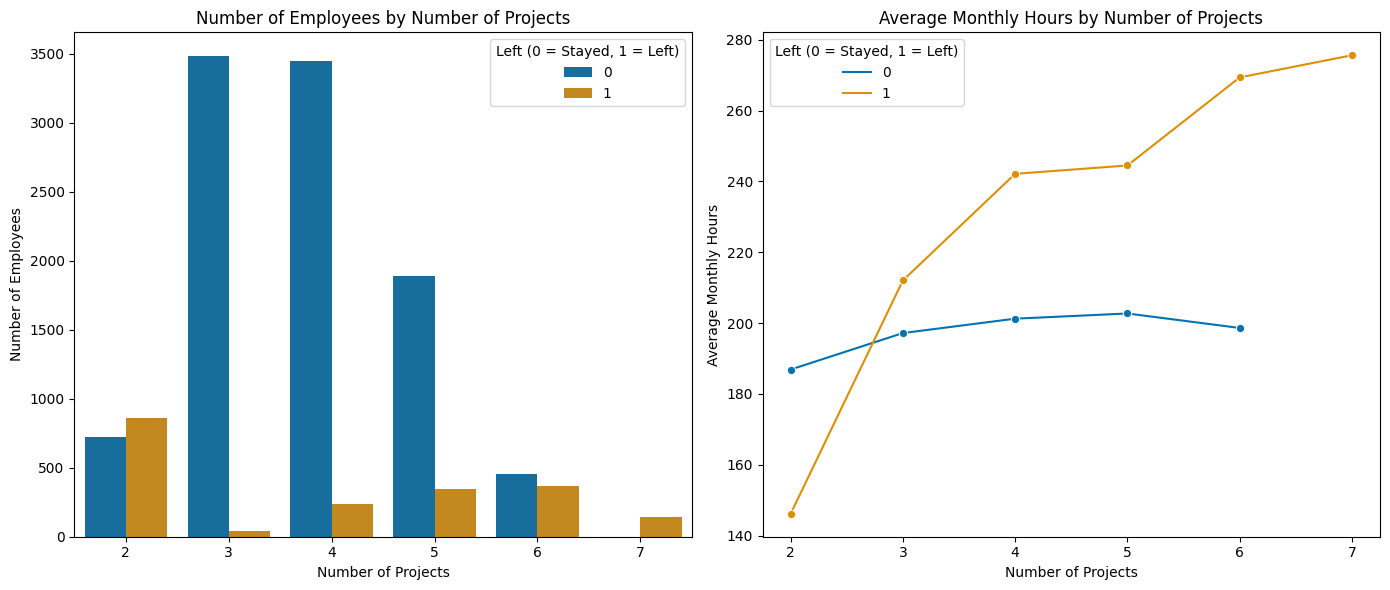

In [22]:
# Step 1: Aggregate average monthly hours by number_project and left
avg_hours = df.groupby(['number_project', 'left'])['average_monthly_hours'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Subplot 1: Countplot ---
sns.countplot(data=df, x='number_project', hue='left', ax=axes[0])
axes[0].set_title('Number of Employees by Number of Projects')
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Number of Employees')
axes[0].legend(title='Left (0 = Stayed, 1 = Left)')

# --- Subplot 2: Line Plot of average monthly hours ---
sns.lineplot(
    data=avg_hours,
    x='number_project',
    y='average_monthly_hours',
    hue='left',
    marker='o',
    ax=axes[1]
)
axes[1].set_title('Average Monthly Hours by Number of Projects')
axes[1].set_xlabel('Number of Projects')
axes[1].set_ylabel('Average Monthly Hours')
axes[1].legend(title='Left (0 = Stayed, 1 = Left)')

# Layout
plt.tight_layout()
plt.show()


In [23]:
# Total employees by number of projects
total_by_project = df.groupby('number_project').size()

# Employees who left by number of projects
left_by_project = df[df['left'] == 1].groupby('number_project').size()

# Percentage of employees who left per project group
left_percentage_by_project = (left_by_project / total_by_project * 100).round(1).fillna(0)

print(left_percentage_by_project)

number_project
2     54.2
3      1.1
4      6.4
5     15.4
6     44.9
7    100.0
dtype: float64


* The data reveals that employee attrition is highest at the extremes of workload, with **54.2%** of employees assigned to **2** projects and **100%** of those with **7** projects leaving the company.This suggests that both underutilization and overload can drive attrition.
* In contrast, employees handling **3 to 4** projects had the lowest attrition rates, at just **1.1% and 6.4%** respectively, indicating an optimal workload range that supports retention.
* Attrition begins to rise again at **5** projects **(15.4%)** and sharply increases at **6** projects **(44.9%)**, highlighting the importance of managing project assignments to maintain employee engagement and well-being.

The average monthly working hours across all project groups for employees who stayed remained relatively stable **(190–197h)**, while those who left varied widely **(from ~145h to ~278h)**. This suggests that both underutilization and work overload are associated with higher attrition.

*Working ~278 hours per month equates to over 9 hours per day including weekends, or 12+ hours per day on weekdays, a clear red flag for excessive job load.*

Attrition is lowest when employees handle **3–4** projects, but spikes when they are under-challenged **(2 projects)** or overloaded **(6–7 projects)**. Maintaining an optimal project load appears key to employee stability.

In [24]:
df['promotion_last_5years'].value_counts(normalize=True) * 100

promotion_last_5years
0    98.307064
1     1.692936
Name: proportion, dtype: float64

Only **1.7%** of employees received a promotion in the last 5 years, while a striking **98.3%** did not.

This suggests that promotions were extremely rare in the organization, which may contribute to employee dissatisfaction and higher attrition rates, especially for longer-tenured or high-performing staff. Limited advancement opportunities could be a key factor behind employees leaving after several years.

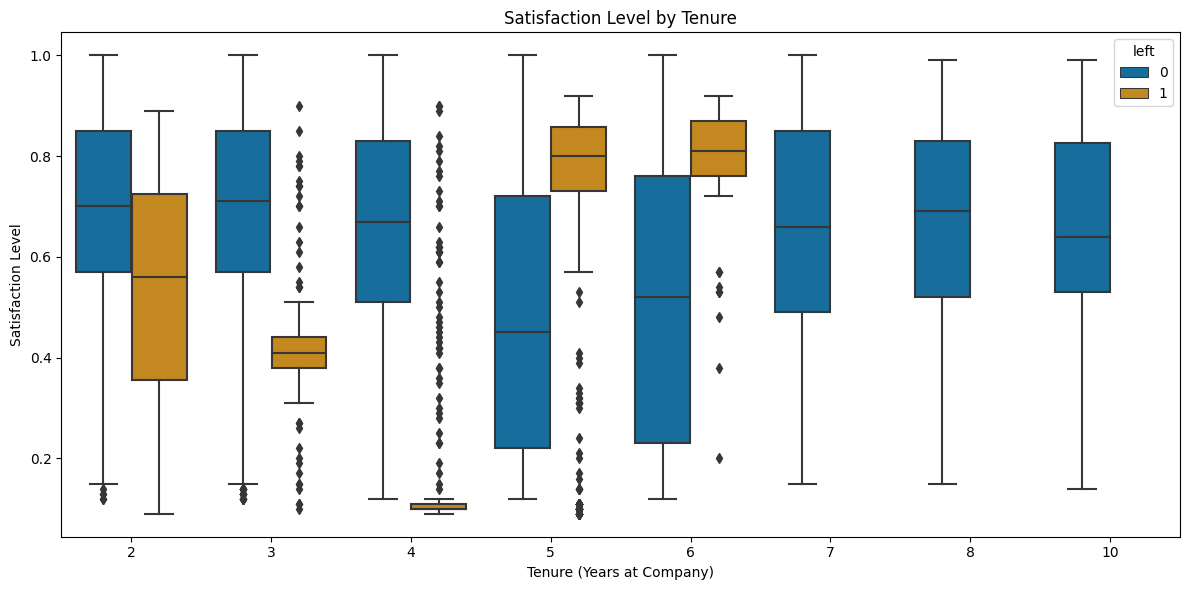

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tenure', y='satisfaction_level',  hue='left')
plt.title('Satisfaction Level by Tenure')
plt.xlabel('Tenure (Years at Company)')
plt.ylabel('Satisfaction Level')
plt.tight_layout()
plt.show()

* Years 2–3: Leavers show noticeably lower satisfaction than those who stayed, indicating **early dissatisfaction** drives attrition.

* Year 4: Sharp drop in satisfaction among leavers with a very narrow range (less than 0.2), **suggesting a critical pain point or systemic issue**.

* Years 5–6: Leavers have high satisfaction, implying exits may be voluntary or opportunity-driven, not due to dissatisfaction.

* Years 7–10: Mostly stayed employees with consistently high satisfaction, indicating strong retention and engagement among long-term staff.

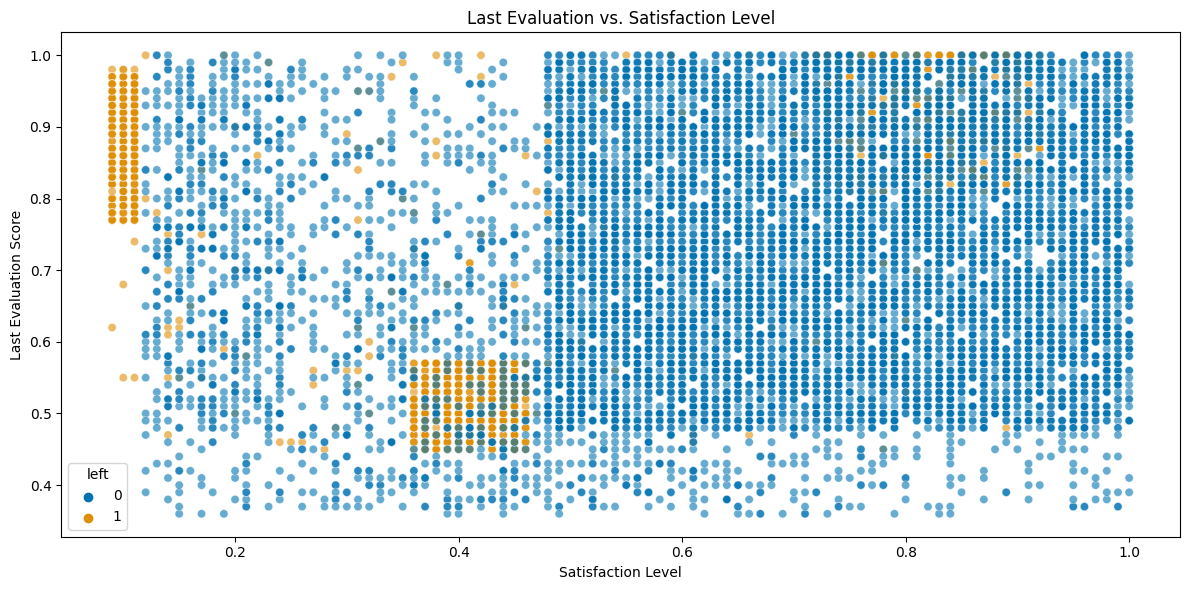

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='satisfaction_level',
    y='last_evaluation',
    hue='left',
    alpha=0.6
)
plt.title('Last Evaluation vs. Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation Score')
plt.tight_layout()
plt.show()


* Starting from the left side of the plot, we observe a group of employees who left despite having high evaluation scores (~0.65–0.98) but low satisfaction levels. This suggests potential issues such as burnout, lack of recognition, or workplace dissatisfaction that warrant further investigation.

* Another group of leavers appears with moderate satisfaction levels(~0.3–0.58). These employees may have left due to **disappointment with performance reviews or lack of growth**.

* The majority of employees are concentrated in the region where both satisfaction and evaluation scores range from ~0.5 to 1.0. Most of these employees stayed, indicating that balanced satisfaction and performance correlates with retention. A few employees in this range did leave, which could suggest **voluntary exits driven by external opportunities** rather than dissatisfaction.

### Refined Insights from the Plots
The plots suggest that employees may be struggling with poor management practices, as reflected in long working hours, high project loads, low salaries, and limited promotion opportunities. Nearly half of the employees left during year 5, which also saw the highest workload (233 hours/month), indicating a possible link between overwork and attrition. In contrast, no attrition occurred beyond year 6, suggesting stronger retention among long-term staff. Most leavers had satisfaction levels below 0.5, and many of them had high evaluation scores (0.75–0.98), hinting at potential burnout or disengagement despite strong performance.

## 2.3 Construct Stage

In [27]:
# Convert 'department' column to dummy variables
df_enc = pd.get_dummies(df, columns=['department'])
df_enc = df_enc.drop("salary", axis=1, errors='ignore')

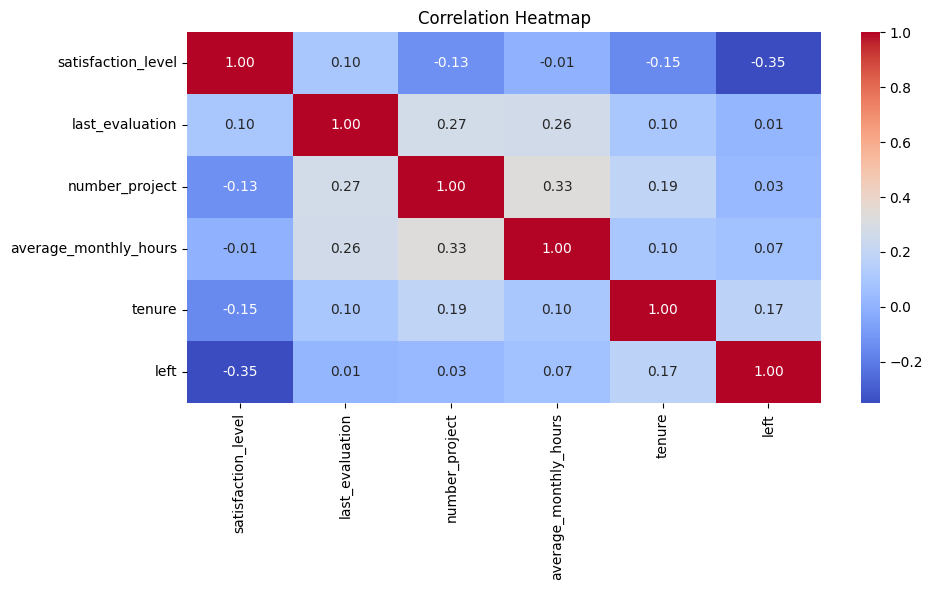

In [28]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'left']]
            .corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [29]:
# Split features and target
X = df_enc.drop('left', axis=1)
y = df_enc['left']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Logistic Regression Model

In [30]:
# Train logistic regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Cross-validation accuracy
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print(f"Cross-validation Accuracy (mean of 5 folds): {cv_scores.mean():.4f}")

Cross-validation Accuracy (mean of 5 folds): 0.7675


In [31]:
# Predict and evaluate
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.7828


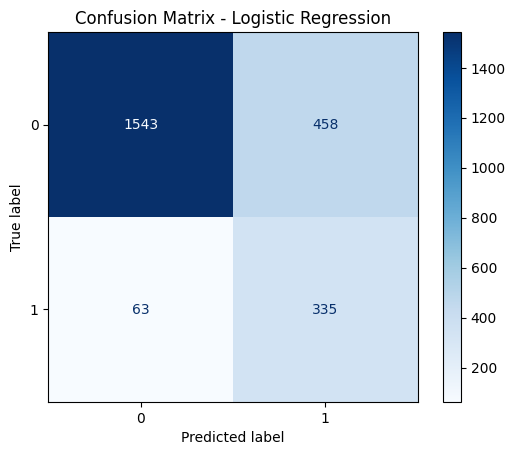

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

* **True Positives (TP)**: The model correctly identified **335** employees who actually left.
* **True Negatives (TN)**: It also accurately predicted **1,543** employees who stayed.
* **False Negatives (FN)**: However, it missed **63** actual leavers, failing to capture those who left.
* **False Positives (FP)**: Additionally, it incorrectly predicted **458** employees as leavers when they actually stayed.

In [33]:
#Classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.96      0.77      0.86      2001
    Predicted would leave       0.42      0.84      0.56       398

                 accuracy                           0.78      2399
                macro avg       0.69      0.81      0.71      2399
             weighted avg       0.87      0.78      0.81      2399



### Decision Tree Model

In [34]:
# Instantiate Decision Tree
tree = DecisionTreeClassifier(random_state=0)

# 3. Define hyperparameters to search
cv_params = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 6]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

grid_search = GridSearchCV(estimator=tree,
                           param_grid=cv_params,
                           scoring=scoring,
                           cv=4,
                           refit='roc_auc',
                           n_jobs=-1,
                           verbose=1)

# 6. Fit
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [35]:
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score on Training Set:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best ROC AUC Score on Training Set: 0.9734680791420808


In [36]:
# Predict on test set
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

# Evaluation
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



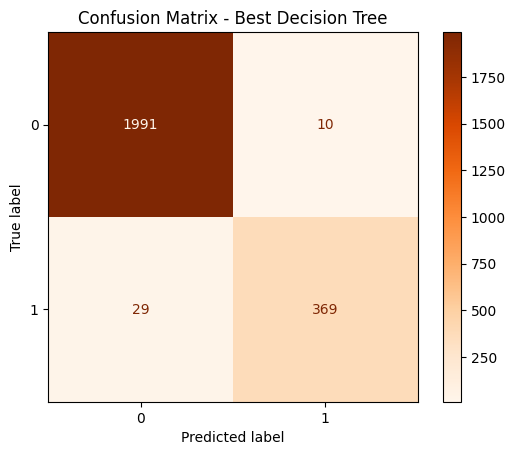

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - Best Decision Tree")
plt.show()

In [38]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [39]:
# Get all CV scores
tree1_cv_results = make_results('Decision Tree CV', grid_search, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.966421,0.915878,0.940424,0.980713,0.973468


All of these scores from the Decision Tree model are strong indicators of good predictive performance.

However, it is important to note that **Decision Trees are prone to overfitting**, especially when not properly pruned.

To improve generalization and reduce overfitting risk, a **Random Forest model** can be constructed next. Random Forests combine multiple trees through ensemble learning, typically resulting in more robust and stable predictions.

### Random Forest Model 

In [40]:
# Define the hyperparameter grid
cv_params = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Apply GridSearchCV with refit based on ROC AUC
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=cv_params,
                       scoring=scoring,
                       refit='roc_auc',
                       cv=4,
                       n_jobs=-1,
                       verbose=1)

# Fit the model
rf_grid.fit(X_train, y_train)

rf_cv_results = make_results("Random Forest CV", rf_grid, "auc")
print(rf_cv_results)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.981054  0.906457  0.942244  0.981547  0.981108


In [41]:
# Predict on test set
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



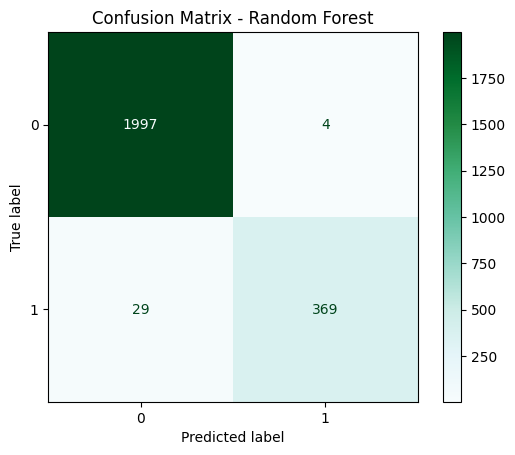

In [42]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(cmap="BuGn")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [43]:
# Create a pandas Series of feature importances
importances = pd.Series(best_rf.feature_importances_, index=X.columns)

# Sort descending
importances_sorted = importances.sort_values(ascending=False)

# Print top features
print("Top 10 Important Features:\n")
print(importances_sorted.head(10))

Top 10 Important Features:

satisfaction_level       0.450897
number_project           0.166695
last_evaluation          0.160062
tenure                   0.123428
average_monthly_hours    0.089230
salary_cls               0.002986
department_sales         0.001494
department_technical     0.001310
department_support       0.000907
department_IT            0.000576
dtype: float64


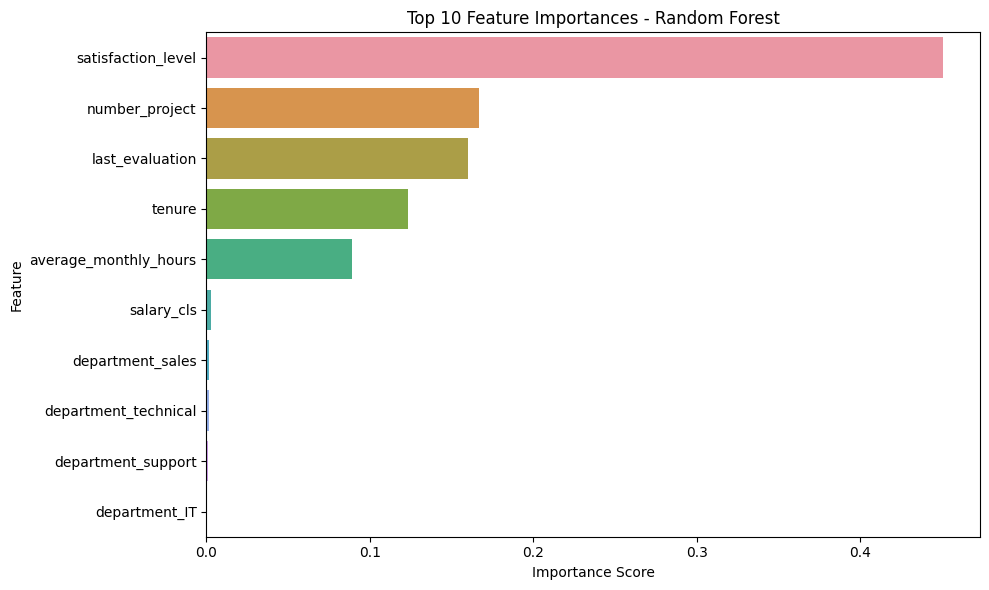

In [44]:
# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.head(10), y=importances_sorted.head(10).index)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


* **Satisfaction level:** by far the most important feature, contributing nearly half of the model’s decision power. Low satisfaction is strongly associated with employee departure.

* **Number of projects and last_evaluation:** both important indicators; very high or very low values may signal overwork or underperformance concerns.

* **Tenure:** is moderately predictive, possibly identifying critical churn windows (e.g., year 5).

* **Average monthly working hours:** workload is a notable factor, supporting insights from previous plots.

## 2.4 Execute Stage

### Summary of model results

 * **Logistic Regression Model:** achieved precision of 87%, recall of 78%, f1-score of 81% (all weighted averages), and accuracy of 78%, on the test set.

* **Decision Tree Model:** achieved AUC of 97.3%, precision of 96.6%, recall of 91.5%, f1-score of 94%, and accuracy of 98%, on the test set.

* **Random Forest Model:** achieved AUC of 98.1%, precision of 98.1%, recall of 90.6%, f1-score of 94.2%, and accuracy of 98.1%, on the test set.

### Conclusion
The results of the decision tree and random forest models clearly point to employee overwork and dissatisfaction as the primary drivers of attrition.

**The most important predictors of employee turnover were:**

* **Satisfaction level** – the single strongest predictor across all models.

* **Number of projects and monthly working hours** – directly linked to workload.

* **Last evaluation** – often high for employees who also worked excessive hours, suggesting performance rewards may be tied to unhealthy effort levels.

* **Tenure** – with a noticeable attrition spike around the 4-year mark, which may indicate burnout or stalled career progression.

These patterns suggest a misalignment between employee workload, recognition, and long-term engagement, potentially rooted in the company’s work culture and performance expectations.

### Recommendations
Limit Project Load: Cap the number of projects assigned to each employee to prevent overwork.

Balance Performance Evaluation: Reward effort and quality, not just long hours. Avoid tying high evaluations solely to excessive workloads.

Support Long-Tenured Staff: Offer career development or promotion opportunities around the 4-year mark to reduce mid-tenure attrition.

Address Work Culture: Facilitate regular team discussions to identify and improve cultural issues contributing to burnout.